#Room Occupancy Estimation
Estimating the precise number of occupants in a room using environmental sensors

#1. Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#2. Data preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/MyDrive/datasets/Occupancy_Estimation.csv'
dataset = pd.read_csv(path, encoding='utf-8-sig', engine='python')
dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [6]:
dataset.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [7]:
dataset.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [9]:
dataset.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [10]:
dataset.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

#3. Feature Extraction

In [12]:
temperature_columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
co2_columns = ['S5_CO2']

for temp_col in temperature_columns:
    for co2_col in co2_columns:
        dataset[temp_col + '_X_' + co2_col] = dataset[temp_col] * dataset[co2_col]

In [13]:
dataset.head(10)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,S1_Temp_X_S5_CO2,S2_Temp_X_S5_CO2,S3_Temp_X_S5_CO2,S4_Temp_X_S5_CO2
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,390,0.769231,0,0,1,9726.6,9652.5,9578.4,9898.2
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,390,0.646154,0,0,1,9726.6,9652.5,9578.4,9921.6
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.06,390,0.519231,0,0,1,9750.0,9652.5,9555.0,9921.6
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.09,390,0.388462,0,0,1,9750.0,9652.5,9578.4,9921.6
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,390,0.253846,0,0,1,9750.0,9652.5,9578.4,9921.6
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,...,0.07,390,0.165385,0,0,1,9750.0,9675.9,9578.4,9921.6
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,...,0.06,390,0.076923,1,0,1,9750.0,9652.5,9578.4,9921.6
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,...,0.05,390,-0.011538,0,0,1,9750.0,9675.9,9578.4,9921.6
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,...,0.13,390,-0.100000,0,0,1,9750.0,9675.9,9578.4,9945.0
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,...,0.39,390,-0.188462,1,1,1,9750.0,9675.9,9578.4,9945.0


In [19]:
dataset = dataset.dropna()
dataset = dataset.reset_index()
dataset = dataset.drop(['index','Date', 'Time'], axis=1)
dataset.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,S1_Temp_X_S5_CO2,S2_Temp_X_S5_CO2,S3_Temp_X_S5_CO2,S4_Temp_X_S5_CO2
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,...,0.06,390,0.769231,0,0,1,9726.6,9652.5,9578.4,9898.2
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,...,0.06,390,0.646154,0,0,1,9726.6,9652.5,9578.4,9921.6
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,...,0.06,390,0.519231,0,0,1,9750.0,9652.5,9555.0,9921.6
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,...,0.09,390,0.388462,0,0,1,9750.0,9652.5,9578.4,9921.6
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,...,0.06,390,0.253846,0,0,1,9750.0,9652.5,9578.4,9921.6


In [52]:
X = dataset.drop('Room_Occupancy_Count', axis=1)
y = dataset['Room_Occupancy_Count']

In [53]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(X)

In [54]:
from keras.utils import to_categorical
y = to_categorical(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
y.shape

(10129, 4)

# 4. Model Implementation

In [74]:
from keras.models import Sequential
from keras.layers import Dense

n_classes = y.shape[1]

# Create a Sequential model
model = Sequential()

# Add an input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add one hidden layer
model.add(Dense(16, activation='relu'))

# Add an output layer
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [75]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                1344      
                                                                 
 dense_29 (Dense)            (None, 16)                1040      
                                                                 
 dense_30 (Dense)            (None, 4)                 68        
                                                                 
Total params: 2452 (9.58 KB)
Trainable params: 2452 (9.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
82/82 [==============================] - 2s 8ms/step - loss: 0.9236 - accuracy: 0.7907 - val_loss: 0.4995 - val_accuracy: 0.7991
Epoch 2/50
82/82 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8646 - val_loss: 0.2680 - val_accuracy: 0.9146
Epoch 3/50
82/82 [==============================] - 0s 5ms/step - loss: 0.1875 - accuracy: 0.9478 - val_loss: 0.1663 - val_accuracy: 0.9501
Epoch 4/50
82/82 [==============================] - 0s 4ms/step - loss: 0.1251 - accuracy: 0.9693 - val_loss: 0.1246 - val_accuracy: 0.9654
Epoch 5/50
82/82 [==============================] - 0s 4ms/step - loss: 0.0961 - accuracy: 0.9780 - val_loss: 0.1024 - val_accuracy: 0.9719
Epoch 6/50
82/82 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.9819 - val_loss: 0.0879 - val_accuracy: 0.9793
Epoch 7/50
82/82 [==============================] - 0s 5ms/step - loss: 0.0661 - accuracy: 0.9837 - val_loss: 0.0762 - val_accuracy: 0.9812
Epoch 8/50
82/82 [==

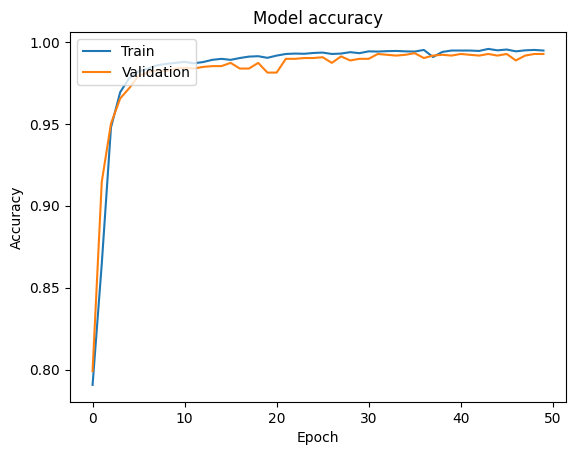

In [76]:
# Fit the model and store the history
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100)

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [77]:
# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


64/64 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9926

accuracy: 99.26%
